In [1]:
cd .. 

/home/jovyan/2018-W-450-4/02-learning-curves


In [2]:
run __init__.py

In [3]:
run src/load_data.py

In [4]:
from sklearn.metrics import accuracy_score, f1_score

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from tqdm import tqdm 
from time import time

In [6]:
adult_train_df = data['adult']['train']['engineered']
adult_train_target = data['adult']['train']['labels']

In [7]:
def sample_training_set(X_train, y_train, n_pcnt):
    n = X_train.shape[0]*n_pcnt//100
    return n, X_train[:n], y_train[:n]

def time_function_call(function_call):
    start = time()
    result = function_call
    execution_time = time() - start
    return result, execution_time

def run_model(model, model_name, n_pcnt, data, labels):

    X_train, X_test, y_train, y_test = train_test_split(data, labels, stratify=labels)

    
    n, X_samp, y_samp = sample_training_set(X_train, y_train, n_pcnt)
    
    _, fit_time = time_function_call(
        model.fit(X_samp, y_samp))
    
    train_pred, train_pred_time = time_function_call(
        model.predict(X_samp))
    
    test_pred, test_pred_time = time_function_call(
        model.predict(X_test))    
    
    return {
            'model' : model,
            'model_name' : model_name,
            'n_pcnt' : n_pcnt,
            'n' : n,
            'f1_train_score' : f1_score(y_samp, train_pred),
            'f1_test_score' : f1_score(y_test, test_pred),
            'accuracy_train_score' : model.score(X_samp, y_samp),
            'accuracy_test_score' : model.score(X_test, y_test),
            'fit_time' : fit_time,
            'train_pred_time' : train_pred_time,
            'test_pred_time' : test_pred_time}

## Variable Ranking - by Single Feature F$_1$ Score 

In [8]:
test_scores = []
for feature in adult_train_df.columns:
    results = run_model(LogisticRegression(), 'variable ranking', 50, adult_train_df[[feature]], adult_train_target)
    test_score = results['f1_test_score']
    if test_score > 0:
        test_scores.append({'feature': feature, 'score' : test_score})


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [9]:
results = pd.DataFrame(test_scores).sort_values('score', ascending=False)
results

,feature,score
1,capital-gain,0.339144
6,education_ Masters,0.196739
2,capital-loss,0.167637
4,workclass_ Self-emp-inc,0.155340
7,education_ Prof-school,0.117216
3,hours-per-week,0.065282
5,education_ Doctorate,0.063251
0,age,0.019963


In [10]:
performant_features = list(results.feature.values)
performant_features

['capital-gain',
 'education_ Masters',
 'capital-loss',
 'workclass_ Self-emp-inc',
 'education_ Prof-school',
 'hours-per-week',
 'education_ Doctorate',
 'age']

In [11]:
features_to_test = []
test_results = {}
for feature in performant_features:
    features_to_test.append(feature)
    test_results[feature] = run_model(LogisticRegression(), 'logit', 100,
                                      adult_train_df[features_to_test],
                                      adult_train_target)

In [12]:
test_results = pd.DataFrame(test_results).T.sort_values('n')
test_results

,accuracy_test_score,accuracy_train_score,f1_test_score,f1_train_score,fit_time,model,model_name,n,n_pcnt,test_pred_time,train_pred_time
age,0.808551,0.812051,0.462366,0.4766,4.52995e-06,"LogisticRegression(C=1.0, class_weight=None, d...",logit,18803,100,3.8147e-06,4.05312e-06
capital-gain,0.797064,0.799819,0.318328,0.32569,4.05312e-06,"LogisticRegression(C=1.0, class_weight=None, d...",logit,18803,100,3.8147e-06,3.8147e-06
capital-loss,0.804084,0.801149,0.384152,0.362707,4.29153e-06,"LogisticRegression(C=1.0, class_weight=None, d...",logit,18803,100,4.29153e-06,4.05312e-06
education_ Doctorate,0.81254,0.81003,0.447579,0.442572,4.29153e-06,"LogisticRegression(C=1.0, class_weight=None, d...",logit,18803,100,4.05312e-06,4.29153e-06
education_ Masters,0.799458,0.798171,0.321641,0.315106,4.29153e-06,"LogisticRegression(C=1.0, class_weight=None, d...",logit,18803,100,3.8147e-06,3.8147e-06
education_ Prof-school,0.810147,0.806733,0.40678,0.398743,4.29153e-06,"LogisticRegression(C=1.0, class_weight=None, d...",logit,18803,100,3.8147e-06,3.8147e-06
hours-per-week,0.80887,0.807956,0.438613,0.435869,4.52995e-06,"LogisticRegression(C=1.0, class_weight=None, d...",logit,18803,100,3.8147e-06,4.05312e-06
workclass_ Self-emp-inc,0.800574,0.803755,0.375624,0.378369,4.29153e-06,"LogisticRegression(C=1.0, class_weight=None, d...",logit,18803,100,3.57628e-06,3.8147e-06


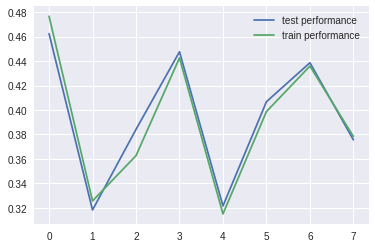

In [13]:
plt.plot(range(len(features_to_test)), test_results.f1_test_score, label='test performance')
plt.plot(range(len(features_to_test)), test_results.f1_train_score, label='train performance')
plt.legend()

## Variable-Ranking - By Regression Coefficient in Full Model

In [14]:
results = run_model(LogisticRegression(), 'logit', 100,
                    adult_train_df,
                    adult_train_target)

In [15]:
results

{'accuracy_test_score': 0.84652201659221438,
 'accuracy_train_score': 0.85076849438919322,
 'f1_test_score': 0.64396743153219838,
 'f1_train_score': 0.65562101129111439,
 'fit_time': 3.814697265625e-06,
 'model': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 'model_name': 'logit',
 'n': 18803,
 'n_pcnt': 100,
 'test_pred_time': 4.0531158447265625e-06,
 'train_pred_time': 4.291534423828125e-06}

In [16]:
logistic_regression_model = results['model']

In [17]:
coefficients = logistic_regression_model.coef_
features = adult_train_df.columns
coefficients = pd.Series(coefficients.T.ravel(), index=features)
coefficients.head()

age                       0.020726
capital-gain              0.000308
capital-loss              0.000599
hours-per-week            0.030247
workclass_ Federal-gov    0.605090
dtype: float64

In [18]:
sorted_coefs = np.abs(coefficients).sort_values(ascending=False)
sorted_coefs.head(20)

sex_ Female                           1.756101
relationship_ Own-child               1.617830
education_ Prof-school                1.474438
education_ 7th-8th                    1.466832
education_ Doctorate                  1.420160
relationship_ Wife                    1.240153
education_ 9th                        1.191730
marital-status_ Never-married         1.111860
education_ 11th                       1.090149
education_ Masters                    1.076959
relationship_ Other-relative          1.053237
occupation_ Farming-fishing           1.034631
education_ 10th                       1.014667
occupation_ Exec-managerial           0.866602
native-country_ Mexico                0.840437
sex_ Male                             0.805181
marital-status_ Separated             0.768913
occupation_ Other-service             0.758949
occupation_ Tech-support              0.752824
marital-status_ Married-civ-spouse    0.714136
dtype: float64

In [19]:
performant_features = list(list(sorted_coefs.head(20).index))
performant_features

['sex_ Female',
 'relationship_ Own-child',
 'education_ Prof-school',
 'education_ 7th-8th',
 'education_ Doctorate',
 'relationship_ Wife',
 'education_ 9th',
 'marital-status_ Never-married',
 'education_ 11th',
 'education_ Masters',
 'relationship_ Other-relative',
 'occupation_ Farming-fishing',
 'education_ 10th',
 'occupation_ Exec-managerial',
 'native-country_ Mexico',
 'sex_ Male',
 'marital-status_ Separated',
 'occupation_ Other-service',
 'occupation_ Tech-support',
 'marital-status_ Married-civ-spouse']

In [20]:
features_to_test = []
test_results = {}
for feature in performant_features:
    print(adult_train_df[features_to_test].shape)
    features_to_test.append(feature)
    test_results[feature] = run_model(LogisticRegression(), 'logit', 100,
                                      adult_train_df[features_to_test],
                                      adult_train_target)

(25071, 0)
(25071, 1)
(25071, 2)
(25071, 3)


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


(25071, 4)
(25071, 5)
(25071, 6)
(25071, 7)
(25071, 8)
(25071, 9)
(25071, 10)
(25071, 11)
(25071, 12)
(25071, 13)
(25071, 14)
(25071, 15)
(25071, 16)
(25071, 17)
(25071, 18)
(25071, 19)


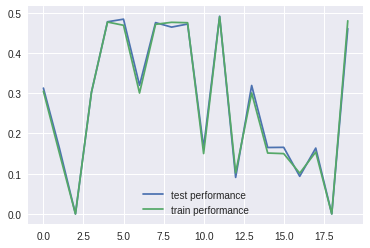

In [21]:
test_results = pd.DataFrame(test_results).T.sort_values('n')

plt.plot(range(len(features_to_test)), test_results.f1_test_score, label='test performance')
plt.plot(range(len(features_to_test)), test_results.f1_train_score, label='train performance')
plt.legend()

In [22]:
features_to_test = ['age', 'capital-gain','capital-loss','hours-per-week']
test_results = {}
for feature in performant_features:
    print(adult_train_df[features_to_test].shape)
    features_to_test.append(feature)
    test_results[feature] = run_model(LogisticRegression(), 'logit', 100,
                                      adult_train_df[features_to_test],
                                      adult_train_target)

(25071, 4)
(25071, 5)
(25071, 6)
(25071, 7)
(25071, 8)
(25071, 9)
(25071, 10)
(25071, 11)
(25071, 12)
(25071, 13)
(25071, 14)
(25071, 15)
(25071, 16)
(25071, 17)
(25071, 18)
(25071, 19)
(25071, 20)
(25071, 21)
(25071, 22)
(25071, 23)


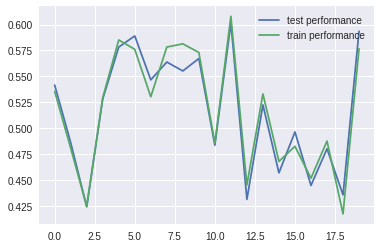

In [23]:
test_results = pd.DataFrame(test_results).T.sort_values('n')

plt.plot(range(len(features_to_test)-4), test_results.f1_test_score, label='test performance')
plt.plot(range(len(features_to_test)-4), test_results.f1_train_score, label='train performance')
plt.legend()